In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
X,y = sklearn.datasets.make_moons(200,noise=0.15)

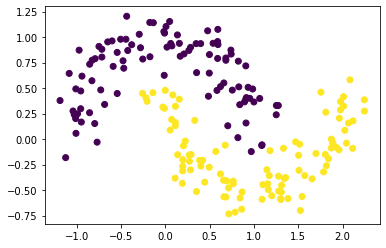

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
X.shape

(200, 2)

In [6]:
# Hyperparameters
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lambda_reg = 0.01


In [7]:
model_dic = {'W1': W1, 'b1': b1,'W2': W2, 'b2': b2}

NameError: name 'W1' is not defined

In [ ]:
def retrieve(model_dict):
    W1 = model_dic['W1']
    b1 = model_dic['b1']
    W2 = model_dic['W2']
    b2 = model_dic['b2']
    return W1,b1,W2,b2


In [12]:
def forward(x, model_dict):
    W1,b1,W2,b2 = retrieve(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, dim=1, keepdims=True)
    return z1,a1,softmax
    

In [13]:
def loss(softmax, y):
    W1,b1,W2,b2 = retrieve(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(predicted)
    softmax_loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2*(np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss = softmax_loss + reg_loss
    return float(loss/y.shape[0])

In [10]:
def predict(x, model_dict):
    W1,b1,W2,b2 = retrieve(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, dim=1, keepdims=True)
    return np.argmax(softmax, axis=1)


In [14]:
def backpropagation(x,y,model_dict,epochs):
    for i in range(epochs):
        W1,b1,W2,b2 = retrieve(model_dict)
        z1,a1,probs = forward(x,model_dict)
        delta3 = np.copy(probs)
        delta3[range(x.shaape[0]),y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3,axis=0,keepdims=True)
        delta2 = delta3.dot(W2.T) * (1-np.power(np.tanh(z1),2))
        dW1 = np.dot(x.T,delta2)
        db1 = np.sum(delta2,axis=0,keepdims=True)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)
        dW1 += lambda_reg * np.sum(W1)
        # Update weights
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1,'W2': W2, 'b2': b2}
        # Print loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {}".format(i,loss(probs,y,model_dict)))
            
        return model_dict
        